In [53]:
from rasa_nlu.model import Trainer
from rasa_nlu import config
from rasa_nlu.model import Interpreter
from constants import TRAINING_PATH, MODEL_PATH, TESTING_PATH
from rasa_nlu.test import run_evaluation
import json
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def hist_plot(input=pd.DataFrame()):
    """Plot number of examples per intent"""
    percent = pd.DataFrame.from_records(input['rasa_nlu_data']['common_examples'])['intent'].value_counts()
    percent.plot(kind='bar', figsize=(10, 8))
    plt.ylabel('Number of examples per intent')
    plt.xlabel('Intents')
    plt.title('Number of examples per intent')
    plt.grid()
    plt.show()


def train():
    """Training model on chatbot corpus"""
    training_data = load_data(TRAINING_PATH)
    trainer = Trainer(config.load('nlu_config.yml'))
    trainer.train(training_data)
    trainer.persist(path='models/', fixed_model_name='nlu_model')


def prediction(input_text=''):
    """Predict the intent and entities of the given sentence """
    interpreter = Interpreter.load(MODEL_PATH)
    result = interpreter.parse(input_text)
    print(json.dumps(result, indent=2, ensure_ascii=False))


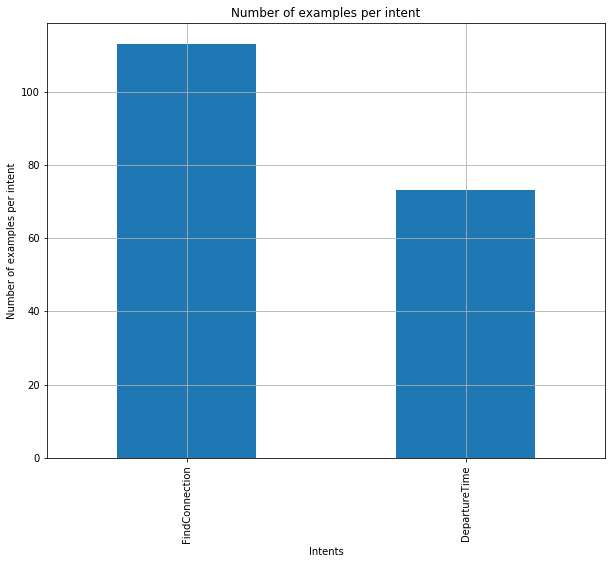

In [55]:
hist_plot(pd.read_json(TRAINING_PATH))  # nb of examples per intent in the training data

In [ ]:
#train()

/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator SVC from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 20/20 [00:00<00:00, 115.10it/s]


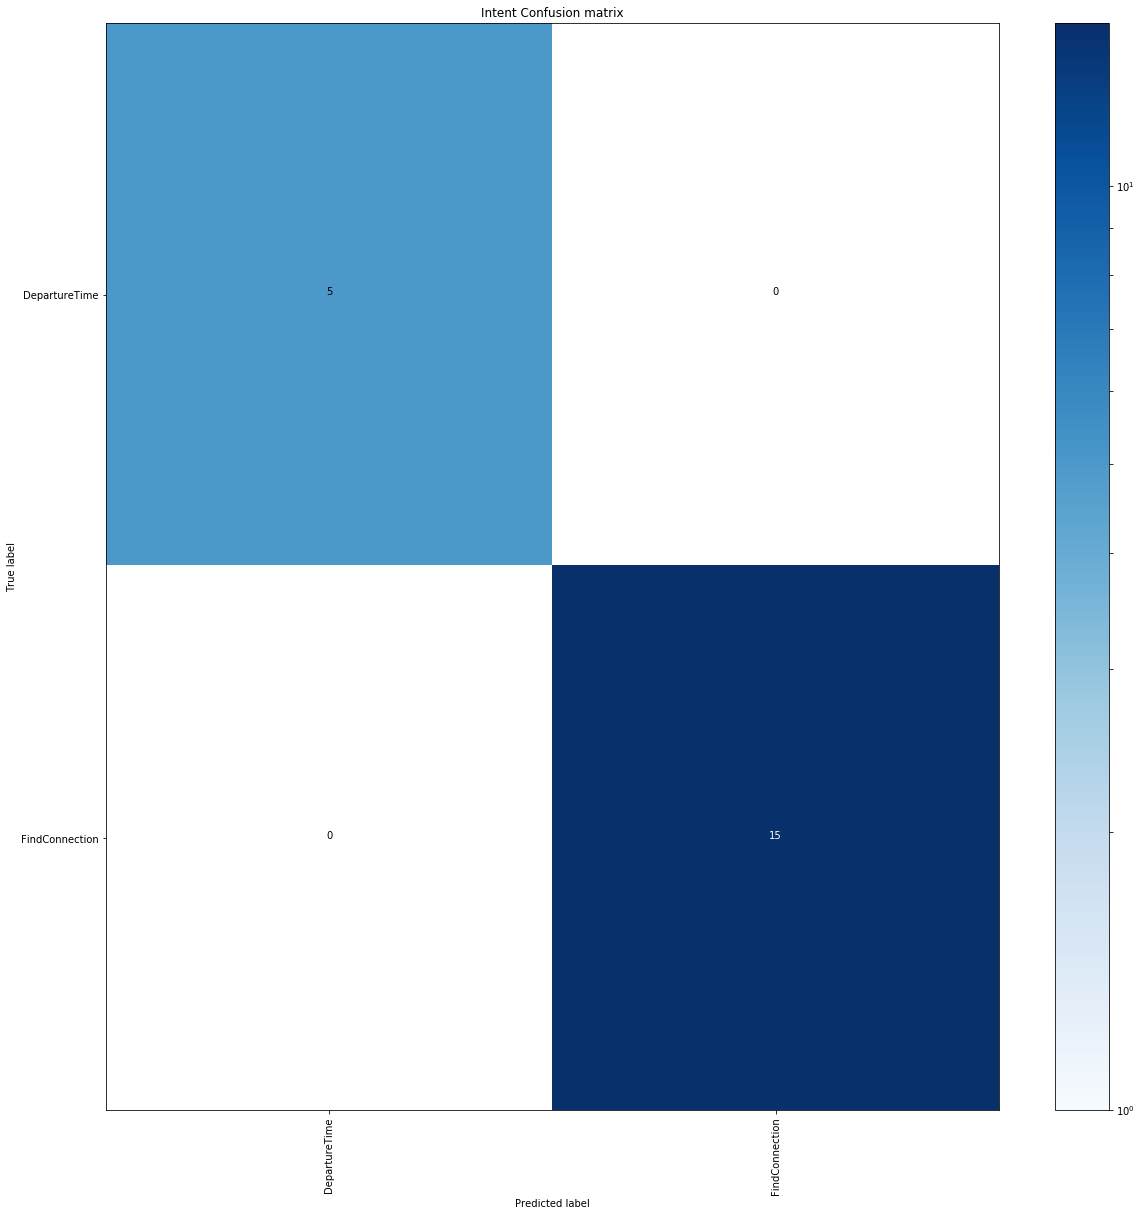

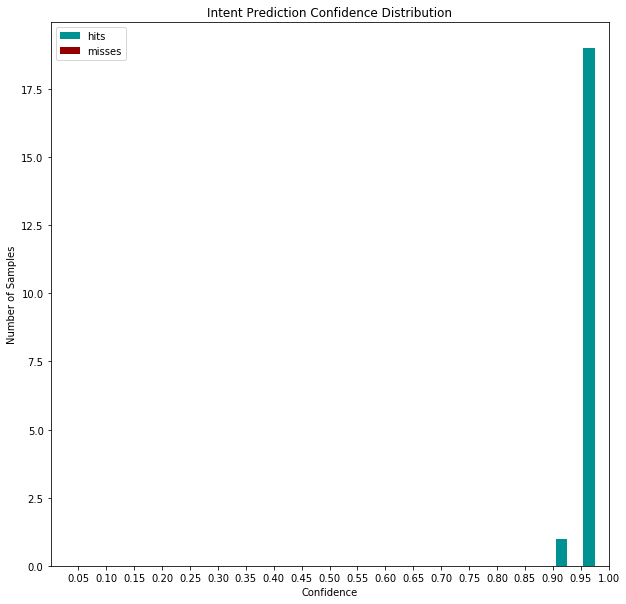

{'intent_evaluation': {'predictions': [{'text': 'i want to go marienplatz',
    'intent': 'FindConnection',
    'predicted': 'FindConnection',
    'confidence': 0.9999999665385552},
   {'text': 'when does the next u-bahn leaves from garching forschungszentrum?',
    'intent': 'DepartureTime',
    'predicted': 'DepartureTime',
    'confidence': 0.9894629114434358},
   {'text': 'when is the next train from winterstraße 12 to kieferngarten',
    'intent': 'FindConnection',
    'predicted': 'FindConnection',
    'confidence': 0.9360882979690281},
   {'text': 'can you find a connection from garching to hauptbahnhof?',
    'intent': 'FindConnection',
    'predicted': 'FindConnection',
    'confidence': 0.9999998479149848},
   {'text': 'how i can get from marienplatz to garching',
    'intent': 'FindConnection',
    'predicted': 'FindConnection',
    'confidence': 0.9999987309578691},
   {'text': 'how to get from bonner platz to freimann?',
    'intent': 'FindConnection',
    'predicted': 'Fi

In [56]:
run_evaluation(TESTING_PATH, MODEL_PATH, errors_filename='errors.json',
                   confmat_filename='confmat', intent_hist_filename='hist')

In [60]:
prediction('can you find a connection from garching to hauptbahnhof?')

/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator SVC from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{
  "intent": {
    "name": "FindConnection",
    "confidence": 0.9999998479149848
  },
  "entities": [
    {
      "start": 31,
      "end": 39,
      "value": "garching",
      "entity": "StationStart",
      "confidence": 0.9896794125545482,
      "extractor": "CRFEntityExtractor"
    },
    {
      "start": 43,
      "end": 55,
      "value": "hauptbahnhof",
      "entity": "StationDest",
      "confidence": 0.9856403308799689,
      "extractor": "CRFEntityExtractor"
    }
  ],
  "intent_ranking": [
    {
      "name": "FindConnection",
      "confidence": 0.9999998479149848
    },
    {
      "name": "DepartureTime",
      "confidence": 1.5208501517834308e-07
    }
  ],
  "text": "can you find a connection from garching to hauptbahnhof?"
}


In [59]:
prediction('when does the next train leaves from Banglore?')

/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator SVC from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/pythagoras/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.20.4 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{
  "intent": {
    "name": "DepartureTime",
    "confidence": 0.9993155753419734
  },
  "entities": [
    {
      "start": 14,
      "end": 18,
      "value": "next",
      "entity": "Criterion",
      "confidence": 0.9736963969960897,
      "extractor": "CRFEntityExtractor"
    },
    {
      "start": 19,
      "end": 24,
      "value": "train",
      "entity": "Vehicle",
      "confidence": 0.9918616145280836,
      "extractor": "CRFEntityExtractor"
    },
    {
      "start": 37,
      "end": 45,
      "value": "banglore",
      "entity": "StationStart",
      "confidence": 0.9170742371168755,
      "extractor": "CRFEntityExtractor"
    }
  ],
  "intent_ranking": [
    {
      "name": "DepartureTime",
      "confidence": 0.9993155753419734
    },
    {
      "name": "FindConnection",
      "confidence": 0.000684424658026568
    }
  ],
  "text": "when does the next train leaves from Banglore?"
}
